In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_json("https://api.covid19india.org/raw_data.json")

In [0]:
data = pd.json_normalize(df['raw_data'])

In [0]:
#data['dateannounced'] = data['dateannounced'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())
data['statuschangedate'] = data[data['statuschangedate'] != ""]['statuschangedate'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())

In [0]:
data['dateannounced'] = data[data['dateannounced'] != ""]['dateannounced'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())

In [0]:
data = data.dropna()

In [7]:
#first case in India
print("First case in India detected on:  {}".format(str(min(data['dateannounced']))))

First case in India detected on:  2020-01-30


In [8]:
print("Total Cases till date: {}".format(data.count()[0]))

Total Cases till date: 3714


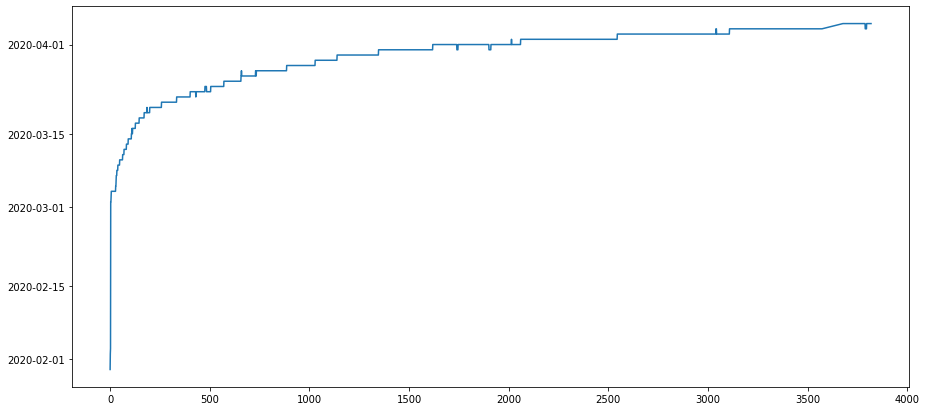

In [9]:
plt.figure(figsize=(15, 7))
plt.plot(data['dateannounced'])
plt.show()

In [10]:
# data=data[data["agebracket"]!=""]
# data["agebracket"] = data["agebracket"].apply(lambda x: (int(str(x[0:2]))+int(str(x[3:5])))/2 if len(x) == 5 else x)
data_based_on_age = data[data["agebracket"].astype(str).str.isdigit()]
data_based_on_age.info

<bound method DataFrame.info of      agebracket  ... typeoftransmission
0            20  ...           Imported
3            45  ...           Imported
4            24  ...           Imported
5            69  ...           Imported
6            55  ...           Imported
...         ...  ...                ...
3730         68  ...                   
3731         62  ...                   
3787         70  ...                   
3788         29  ...                   
3796         42  ...                   

[902 rows x 20 columns]>

In [11]:
data_based_on_age["agebracket"] = data_based_on_age["agebracket"].apply(pd.to_numeric)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Age group')

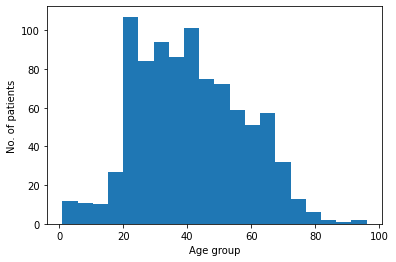

In [12]:
plt.hist(data_based_on_age["agebracket"], bins=20)
plt.ylabel("No. of patients")
plt.xlabel("Age group")

In [13]:
data_based_on_age.describe()

,agebracket
count,902.000000
mean,40.811530
std,16.701331
min,1.000000
25%,27.000000
50%,39.000000
75%,53.000000
max,96.000000


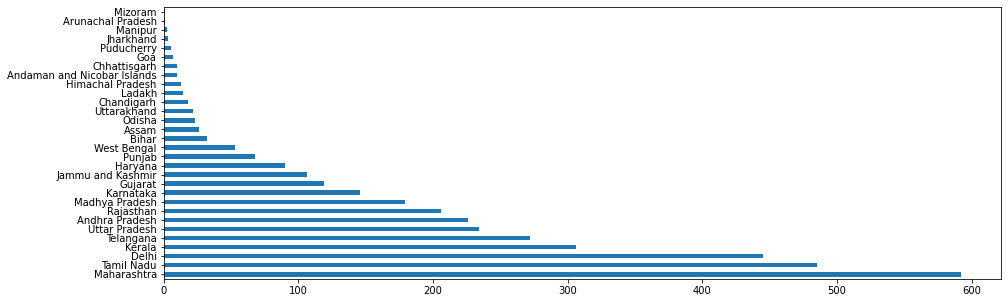

In [14]:
data['detectedstate'].value_counts().plot(kind='barh', figsize=(15,5))

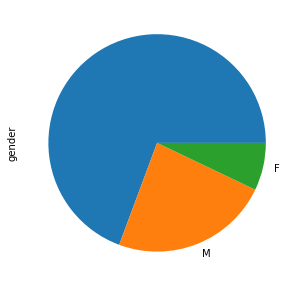

In [15]:
data['gender'].value_counts().plot(kind='pie', figsize=(15,5))

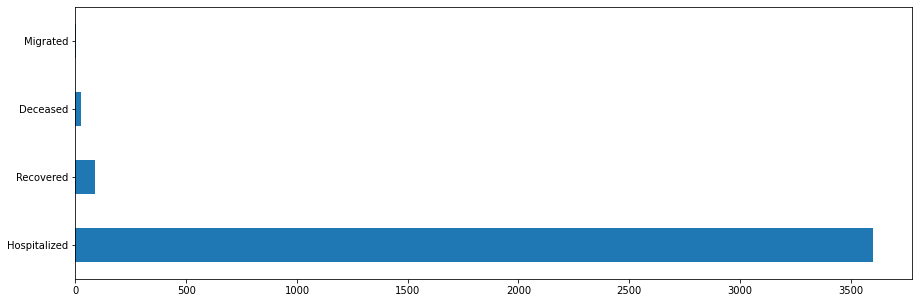

In [16]:
#Life expectancy
data['currentstatus'].value_counts().plot(kind='barh', figsize=(15,5))


In [17]:
#Life expectancy in Male
data[data['gender']=='M']['currentstatus'].value_counts()


Hospitalized    823
Recovered        37
Deceased         16
Name: currentstatus, dtype: int64

In [18]:
#Life expectancy in Female
data[data['gender']=='F']['currentstatus'].value_counts()


Hospitalized    237
Recovered        19
Deceased          7
Name: currentstatus, dtype: int64

In [19]:
#Top ten affected District
data['detecteddistrict'].value_counts().head(25)

                       777
Mumbai                 313
Kasaragod              142
Indore                 128
Pune                    93
Chennai                 91
Gautam Buddha Nagar     58
Jaipur                  56
Bengaluru               53
Ahmadabad               53
Thane                   52
Kannur                  50
Agra                    44
Dindigul                43
Tirunelveli             37
Hyderabad               36
S.P.S. Nellore          34
Coimbatore              33
Gurugram                31
Guntur                  30
Krishna                 28
Mysuru                  28
Erode                   27
Evacuees                27
Bhilwara                27
Name: detecteddistrict, dtype: int64

In [20]:
#top reasons behind affection in India
data['notes'].value_counts().head(10)

                                                     988
Details awaited                                      743
Attended Delhi Religious Conference                  479
Details Awaited                                      221
Travelled from Dubai                                  73
Local Transmission                                    39
Travelled from UK                                     26
Travelled from Dubai, UAE                             25
attended religious event Tablighi Jamaat in delhi     24
Contact transmission                                  22
Name: notes, dtype: int64

In [21]:
data['typeoftransmission'].value_counts().head(10)

            1889
TBD          807
Imported     542
Local        476
Name: typeoftransmission, dtype: int64

Attended Delhi Religious Conference                                         58
Details Awaited                                                              4
Family contact of TN-P42                                                     4
Contact of Positive Patient                                                  2
No Travel History                                                            2
Travelled from London via Bangaloe then to Chennai by Car on 14th March      1
Grandmother of TN-P28                                                        1
Travelled from London via Bengaluru                                          1
No travel history                                                            1
Travelled from California via Singapore to Chennai Airport on 20.03.2020     1
Name: notes, dtype: int64


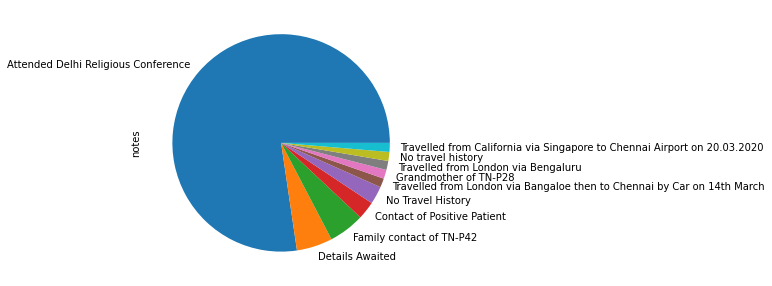

In [22]:
#Top reasons behind corona afefction in Chennai
print(data[data['detecteddistrict']=='Chennai']['notes'].value_counts().head(10))
data[data['detecteddistrict']=='Chennai']['notes'].value_counts().head(10).plot(kind='pie', figsize=(15,5))

Attended Delhi Religious Conference                              395
Travelled from Delhi and Contact history with TN-P5 and TN-P6     10
Travelled from Delhi                                              10
Contact of Positive Patient                                        5
Family contact of TN-P42                                           4
Indonesian Tourist                                                 4
Details Awaited                                                    4
                                                                   3
Contact of TN-P43                                                  3
Contact with Thai Nationals                                        2
Name: notes, dtype: int64


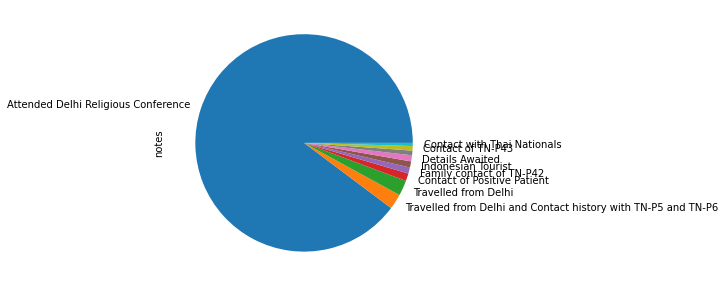

In [23]:
#Top reasons behind corona afefction in TamilNadu
print(data[data['statecode']=='TN']['notes'].value_counts().head(10))
data[data['statecode']=='TN']['notes'].value_counts().head(10).plot(kind='pie', figsize=(15,5))

In [0]:
data['time_taken_to_change_status'] = data['statuschangedate'] - data['dateannounced']

In [25]:
#Average time taken by to recover
time_taken_to_recover = data[(data['currentstatus'] == 'Recovered') & (data['time_taken_to_change_status'] != '0 days')]['time_taken_to_change_status']
print("Average time taken to recover {}".format(str(time_taken_to_recover.mode())))

Average time taken to recover 0   25 days
dtype: timedelta64[ns]


In [26]:
#Average time taken by to get deceased
time_taken_to_decease = data[(data['currentstatus'] == 'Deceased') & (data['time_taken_to_change_status'] != '0 days')]['time_taken_to_change_status']
print("Average time taken to get deceased {}".format(str(time_taken_to_decease.mean())))
print("Maximum time taken in case of deceased {}".format(str(time_taken_to_decease.max())))

Average time taken to get deceased 2 days 03:00:00
Maximum time taken in case of deceased 6 days 00:00:00


In [0]:
from datetime import date
data['patient_duration'] = date.today() - data['dateannounced']

In [28]:
#Hospitalized since
data[data['currentstatus'] == 'Hospitalized']['patient_duration'].value_counts()

2 days     559
3 days     486
1 days     475
4 days     424
5 days     287
6 days     207
9 days     152
8 days     141
0 days     137
7 days     109
13 days     88
11 days     84
15 days     69
12 days     69
10 days     66
14 days     65
16 days     56
18 days     24
17 days     22
22 days     16
19 days     14
20 days     12
25 days      7
23 days      6
32 days      5
24 days      5
27 days      4
26 days      4
21 days      3
29 days      2
31 days      1
Name: patient_duration, dtype: int64

In [29]:
#Top reasons behind corona afefction in top affected cities
for city in ["Mumbai", "Kasaragod", "Jaipur", "Indore", "Coimbatore", "Kannur", "Bengaluru"]:
  print("\n City name: ",city)
  print(data[data['detecteddistrict']==city]['notes'].value_counts().head(5))


 City name:  Mumbai
                                                     154
Details awaited                                       56
Details Awaited                                       48
Private hospital case in Mumbai metropolitan area     18
Travel history, details awaited                        5
Name: notes, dtype: int64

 City name:  Kasaragod
Travelled from Dubai         44
Travelled from Dubai, UAE    19
Contact transmission         16
                             13
Details awaited              12
Name: notes, dtype: int64

 City name:  Jaipur
Contacts of first positive in Ramganj                                                                      13
Family member of Patient, ID Unknown                                                                        8
Contacts of a person who had tested positive earlier, this person has infected 17 of his close contacts     7
                                                                                                           

Conclusion: Metro cities are badly affected by Corona virus.
Kasargod is in worst condition even it is not metro city.
The main reason behind spread of Corona virus is Delhi religious conference and persons travelled from UK and Dubai. Average time taken to recover of patients is around 25 days. If patients is alive more than 5 days, then chances of recovery are high.